# EDA
regular text
**raraa**
*italic*
- 

## Understand the problem. 
#### We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.

## Univariable study. 
#### We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.

## Multivariate study. 
#### We'll try to understand how the dependent variable and independent variables relate.

## Basic cleaning. 
#### We'll clean the dataset and handle the missing data, outliers and categorical variables.

## Test assumptions. 
#### We'll check if our data meets the assumptions required by most multivariate techniques.

In [14]:
# Import libraries
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm #Chu y tim hieu them
from sklearn.preprocessing import StandardScaler #Chu y tim hieu
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [64]:
# Read training set
df_train = pd.read_csv('train.csv')

In [4]:
# Check training columns
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# Looking for columns name, Dtype(numeric,categorical), categorical chia
# lam 3 Segment:Building, Space, Location.
# Expectation columns nao anh huong SalePrice: High, Medium, Low
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

https://docs.google.com/spreadsheets/d/1tTn65zN63o0Cmkz7GcpSdROW-hxwLwlLYM9uJvgEe4s/edit#gid=0
### Link excel de chon ra nhung feature so sanh voi SalePrice
1 MSZoning
2 LotFrontage
3 LotConfig
4 Neighborhood
5 OverallQual
6 OverallCond
7 Foundation
8 GrLiveArea
9 YearBuilt

In [5]:
# SalePrice analyzing
pd.set_option('float_format', '{:,.2f}'.format) #Can tim hieu them
df_train.SalePrice.describe()

count     1,460.00
mean    180,921.20
std      79,442.50
min      34,900.00
25%     129,975.00
50%     163,000.00
75%     214,000.00
max     755,000.00
Name: SalePrice, dtype: float64

### Seem pretty normal, no missing value and min is not Zero

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

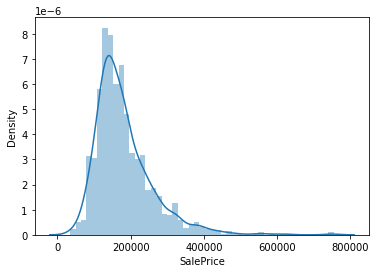

In [6]:
# Histogram 
sns.distplot(df_train.SalePrice)

### Right Skewed (central at $180,921)
### All positive number
### Peak at around 8 million house sold at mean

In [7]:
# skewness and kurtosis ? tai sao lai tinh cai nay
print('Skewness: %f' %df_train.SalePrice.skew())
print('Kurtosis: %f' %df_train.SalePrice.kurtosis())

Skewness: 1.882876
Kurtosis: 6.536282


## Relationship with continuous numerical var

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

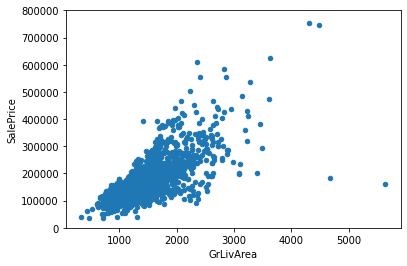

In [3]:
# scatter plot GrLivArea/SalePrice
var = 'GrLivArea'
data = pd.concat([df_train[var],df_train['SalePrice']],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

## Relationship with discrete numerical var and categorical

(-0.5, 4.5, 0.0, 800000.0)

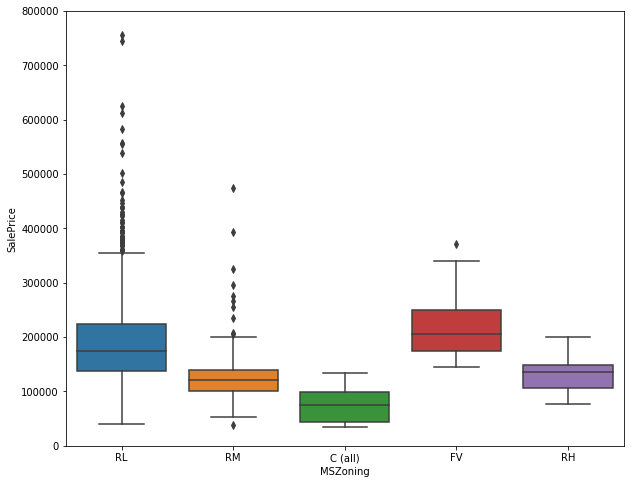

In [5]:
# Boxplot MSZoning/SalePrice
var = 'MSZoning'
data = pd.concat([df_train[var],df_train['SalePrice']],axis=1)
f,ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

## Not having so much impact

(-0.5, 109.5, 0.0, 800000.0)

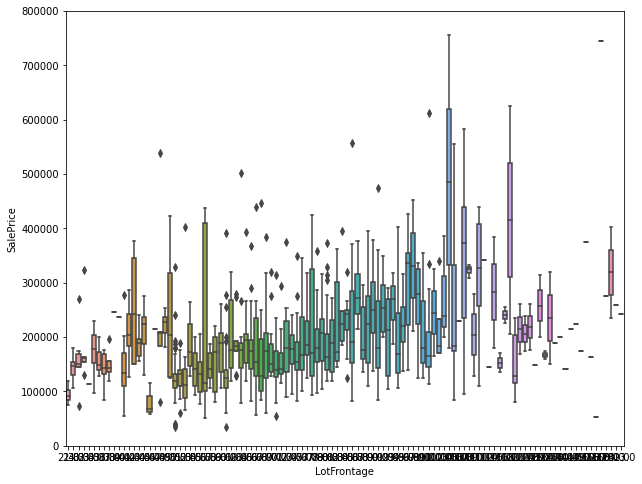

In [48]:
# Boxplot LotFrontage/SalePrice
var = 'LotFrontage'
data = pd.concat([df_train[var],df_train['SalePrice']],axis=1)
f,ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

## seem to have a trend but not consistence

(-0.5, 4.5, 0.0, 800000.0)

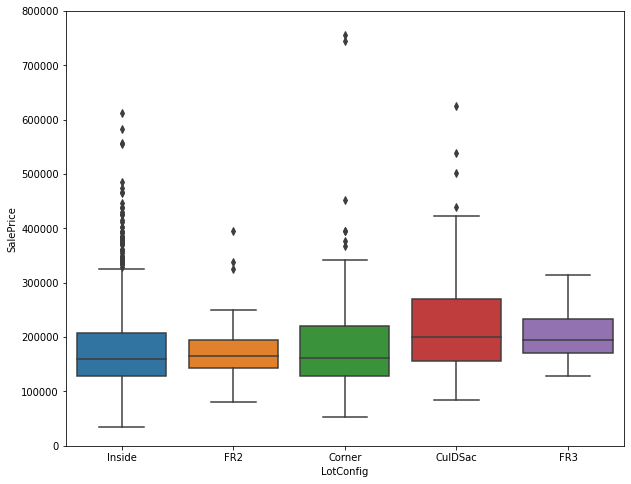

In [8]:
# Boxplot LotConfig/SalePrice
var = 'LotConfig'
data = pd.concat([df_train[var],df_train['SalePrice']],axis=1)
f,ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

## Seem like same at all categories

(-0.5, 24.5, 0.0, 800000.0)

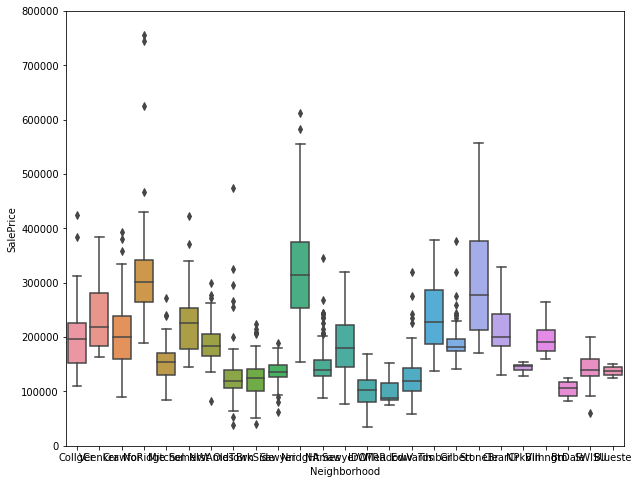

In [9]:
# Boxplot Neighborhood/SalePrice
var = 'Neighborhood'
data = pd.concat([df_train[var],df_train['SalePrice']],axis=1)
f,ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

(-0.5, 9.5, 0.0, 800000.0)

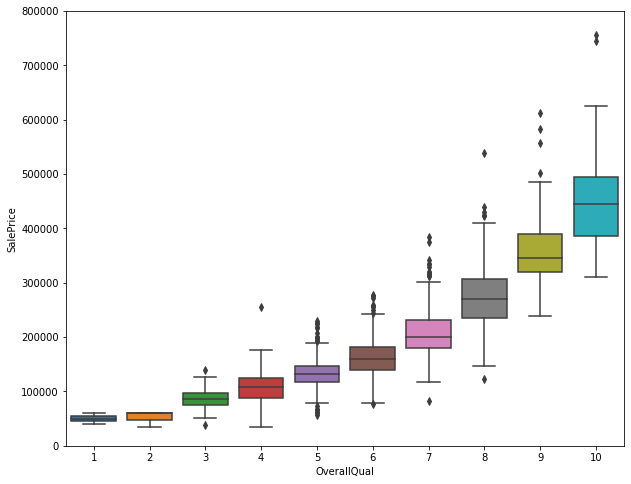

In [10]:
# Boxplot OverallQual/SalePrice
var = 'OverallQual'
data = pd.concat([df_train[var],df_train['SalePrice']],axis=1)
f,ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

## We seeing a nice trend here: OverallQual has corr with SalePrice

(-0.5, 8.5, 0.0, 800000.0)

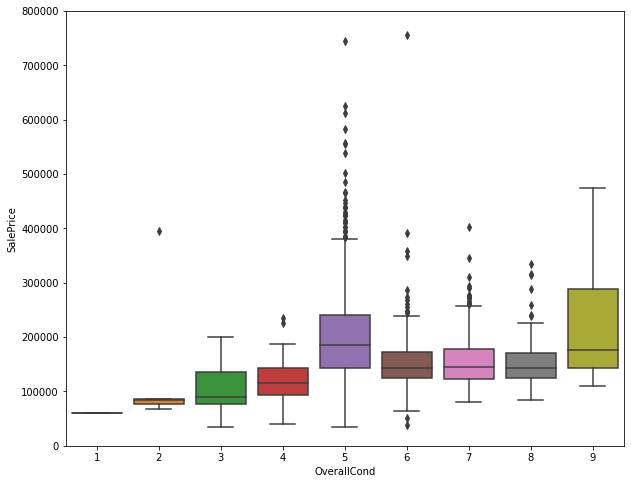

In [11]:
# Boxplot OverallCond/SalePrice
var = 'OverallCond'
data = pd.concat([df_train[var],df_train['SalePrice']],axis=1)
f,ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

## Also have a trend but at 5 seem like having some outliner
## We can choose OverallQual instead

(-0.5, 5.5, 0.0, 800000.0)

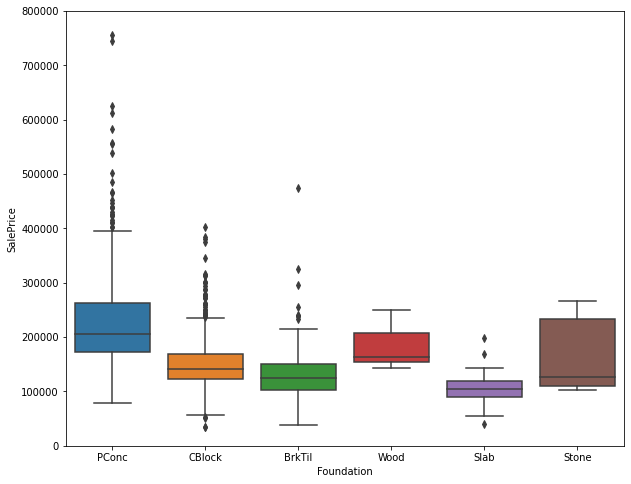

In [12]:
# Boxplot Foundation/SalePrice
var = 'Foundation'
data = pd.concat([df_train[var],df_train['SalePrice']],axis=1)
f,ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

## Not having to much impact

(-0.5, 111.5, 0.0, 800000.0)

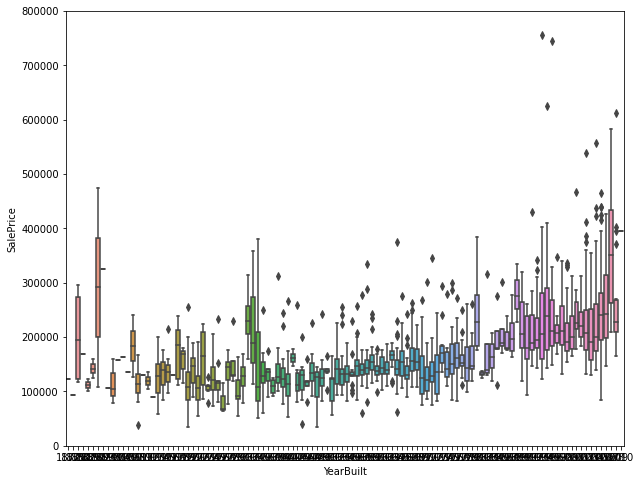

In [13]:
# Boxplot YearBuilt/SalePrice
var = 'YearBuilt'
data = pd.concat([df_train[var],df_train['SalePrice']],axis=1)
f,ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

## Not a strong tendency but can regconize newer stuffs is better


# Summary
### OverallQual and YearBuilt seem to have some relationship with SalePrice
### GriLivArea seem to have a positive linear relationship with SalePrice

<AxesSubplot:>

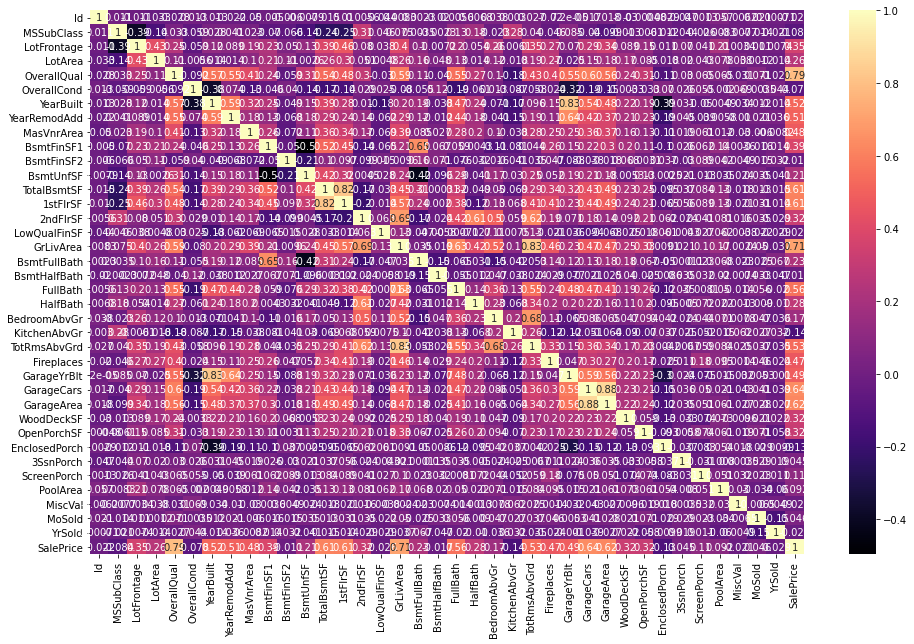

In [6]:
# Correlation matrix 
# Help to check is there any relationship need to notice
corrmat = df_train.corr()
f,ax = plt.subplots(figsize=(16,10))
sns.heatmap(corrmat,cmap='magma',annot=True)

## GrarageArea, GarageCars, GrLivArea, 1stFlrSF, TotalBsmtSF,OveralQual

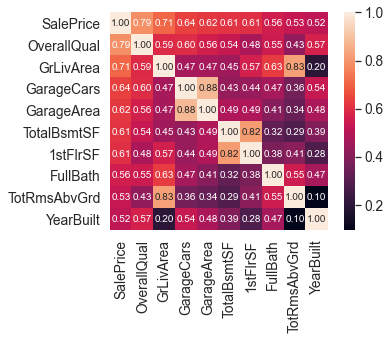

In [7]:
# SalePrice correlation matrix close look
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index #tim hieu
cm = np.corrcoef(df_train[cols].values.T) #tim hieu
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f'
                ,annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

<!-- ### GrLivArea and TotalRmsAbvGrd we take GrLivArea becuase GrLivArea is total area above the ground
### TotalBsmtSF and 1stFloor also the same 
### GarageCars and GarageArea is kinda seem, we take GarageCars because it bigger
#### OverallQual
#### GriLivArea
#### TotalBsmtSF
#### GarageCars
#### 1stFlrSF
#### Fullbath
#### YearBuilt
#### is the final feature -->

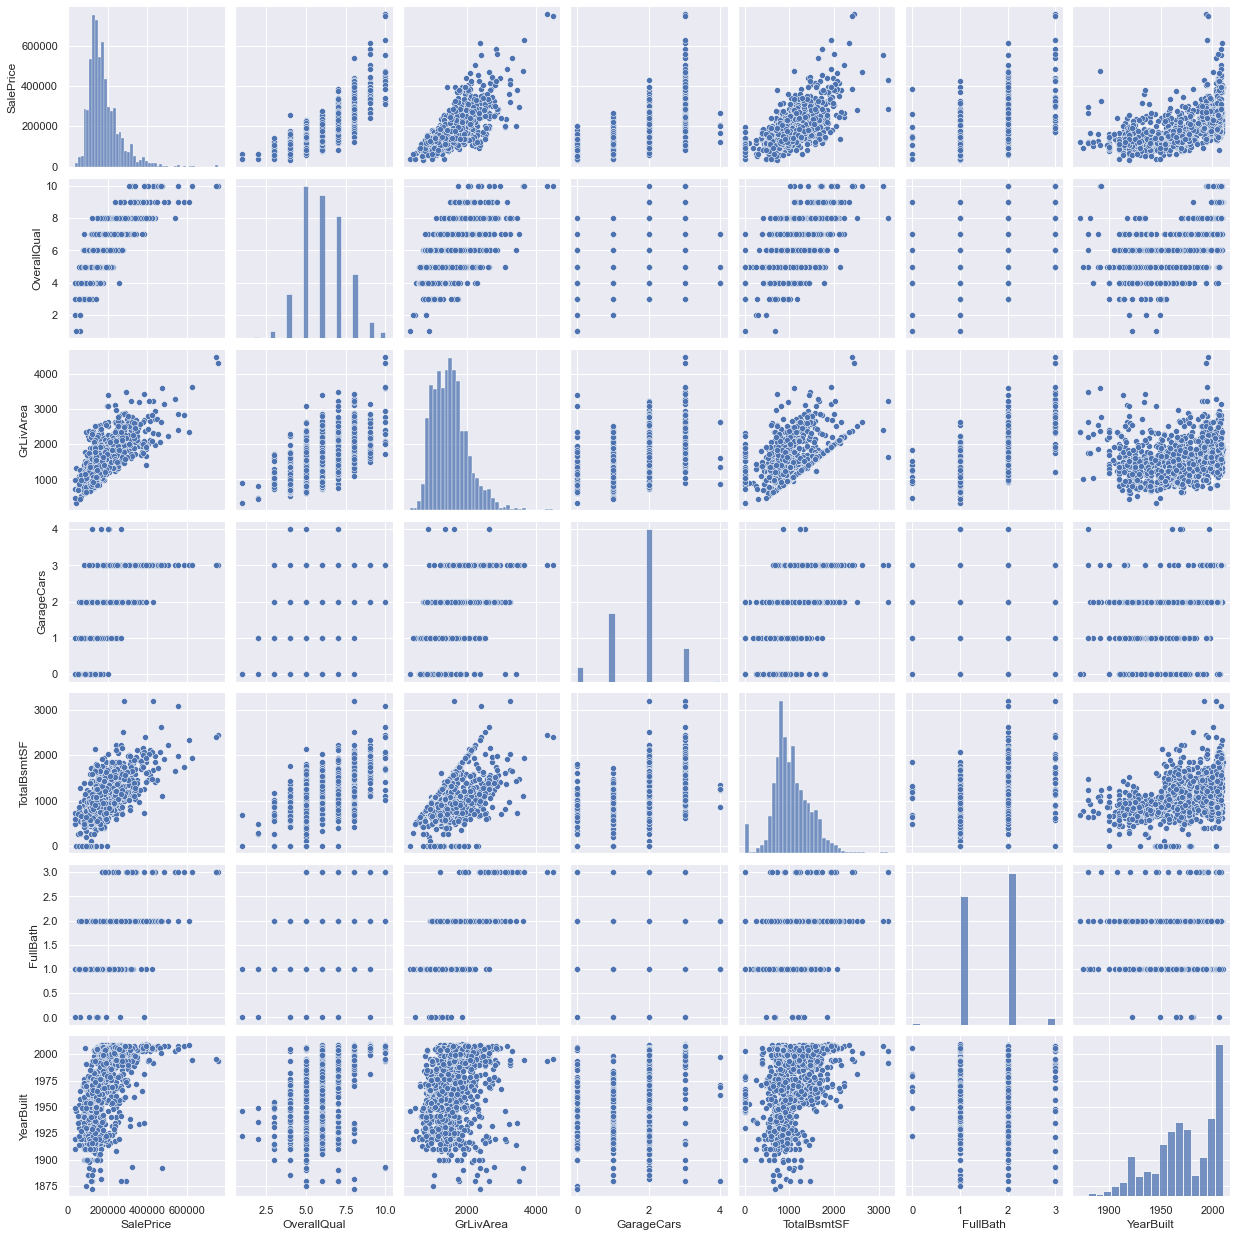

In [61]:
# Scatterplot with correlation feature 
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF',
        'FullBath','YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show()

"""GrLivArea and TotalBsmtSF has a linear trend
YearBuilt has an exponential show how rapid price goes up."""


In [8]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,1.00
MiscFeature,1406,0.96
Alley,1369,0.94
Fence,1179,0.81
FireplaceQu,690,0.47
LotFrontage,259,0.18
GarageCond,81,0.06
GarageType,81,0.06
GarageYrBlt,81,0.06
GarageFinish,81,0.06


In [34]:
"""We will delete features that more than 15% (PoolQC to LotFrontage)
Since none of this features are correlate with SalePrice
GarageX has the same missing value = 81 just 5% plus important feature relate
are in GarageCars
Same go for BmstX
MasVnX are not important feature
Electrical is just 1 record so we just leave it."""


'We will delete features that more than 15% (PoolQC to LotFrontage)\nSince none of this features are correlate with SalePrice\nGarageX has the same missing value = 81 just 5% plus important feature relate\nare in GarageCars\nSame go for BmstX\nMasVnX are not important feature\nElectrical is just 1 record so we just leave it.'

### Dealing with outliner
### Univariate SalePrice
"""Univariate analysis with SalePrice
Define the threshold to define outliner
Standardize data is needed (Converting data to have mean = 0, std =1)"""


In [23]:
# Standardizing data
saleprice_scaled = StandardScaler().fit_transform(
    df_train['SalePrice'][:,np.newaxis]); #tim hieu them
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

float_formatter = "{:.4f}".format
float_formatter = np.set_printoptions(threshold=sys.maxsize,
                                      formatter={'float_kind':float_formatter})

print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range(high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.8387]
 [-1.8335]
 [-1.8009]
 [-1.7833]
 [-1.7745]
 [-1.6234]
 [-1.6171]
 [-1.5856]
 [-1.5856]
 [-1.5731]]

outer range(high) of the distribution:
[[3.8290]
 [4.0410]
 [4.4963]
 [4.7104]
 [4.7303]
 [5.0621]
 [5.4238]
 [5.5919]
 [7.1029]
 [7.2288]]


In [33]:
"""Low range values are not to far from 0
   High range values are far from O and the 7.22 and 7.10 values are really out of range.
   For now, we'll not consider any of these values as an outliner but we 
   should be careful with these two 7.22 and 7.10"""

"Low range values are not to far from 0\n   High range values are far from O and the 7.22 and 7.10 values are really out of range.\n   For now, we'll not consider any of these values as an outliner but we \n   should be careful with these two 7.22 and 7.10"

### Bivariate analysis

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

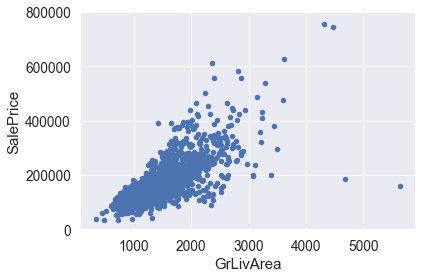

In [32]:
# Bivariate analysis SalePrice/GriLivArea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800_000))


"""The 2 value with at 4000 and 5000 'GrLivArea' seem a little odd with 
   its 'SalePrice'. Maybe this is agricultural area but it definently not
   representative so we delete them.
   The 2 value with 7.22 and 7.01 we will look carefull for those, they may
   look like special cases but they follow the trend, we keep them."""

In [65]:
# Deleting points
df_train.sort_values(by='GrLivArea', ascending=False)[:2]
df_train=df_train.drop(df_train[df_train['Id']==1299].index)
df_train=df_train.drop(df_train[df_train['Id']==524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

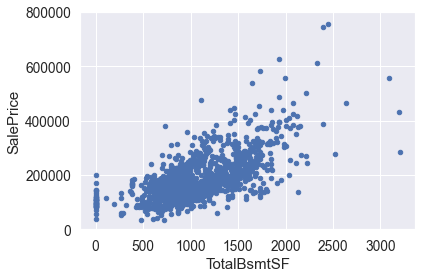

In [50]:
# Bivariate analysis SalePrice/TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800_000))

"""We can feel tempted to eliminate some observations(>3000) but I suppose it is not worth it."""

### Normality test


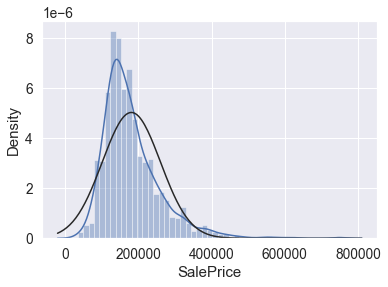

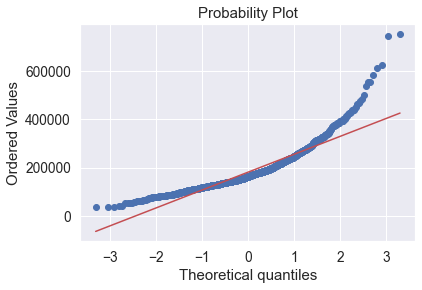

In [66]:
# SalePrie 
"""Histogram: Kurtosis and Skewness.
   Normal probability plot: Data distribution should closely follow the 
   diagonal that represents the normal distribution"""
sns.distplot(df_train['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_train["SalePrice"],plot=plt)

In [53]:
"""SalePrice is not normal. It is positive skew to the right, log transformation
usually works well to transform to normal dist"""

'SalePrice is not normal. It is positive skew to the right, log transformation\nusually works well to transform to normal dist'

In [67]:
# Applying log transformtion
df_train['SalePrice'] = np.log(df_train['SalePrice'])

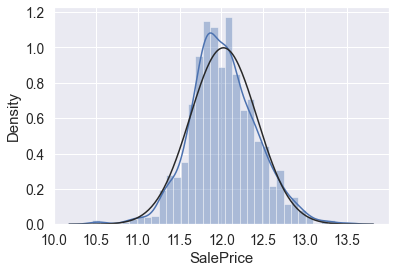

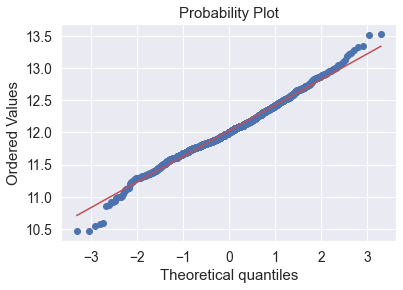

In [68]:
sns.distplot(df_train['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_train["SalePrice"],plot=plt)

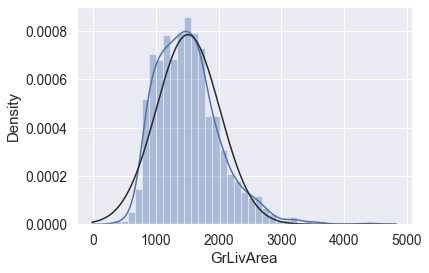

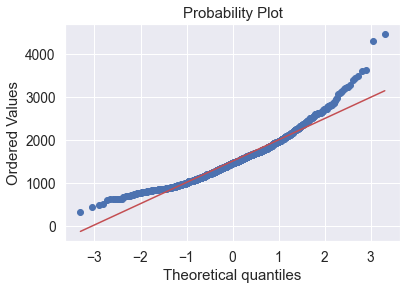

In [57]:
# Check on GrLivArea
sns.distplot(df_train['GrLivArea'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_train["GrLivArea"],plot=plt)

In [69]:
# Data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

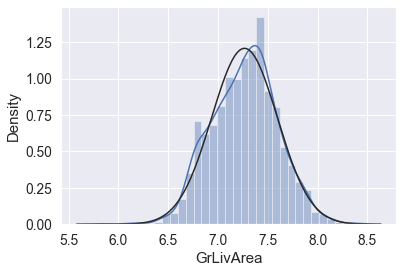

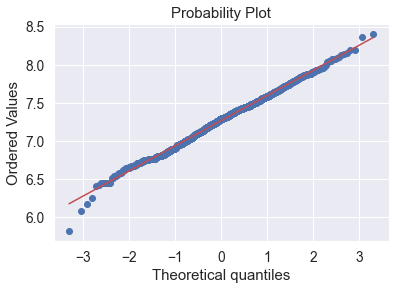

In [70]:
# Check on GrLivArea
sns.distplot(df_train['GrLivArea'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_train["GrLivArea"],plot=plt)

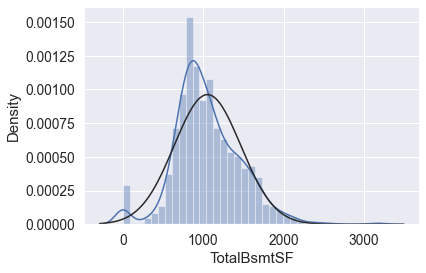

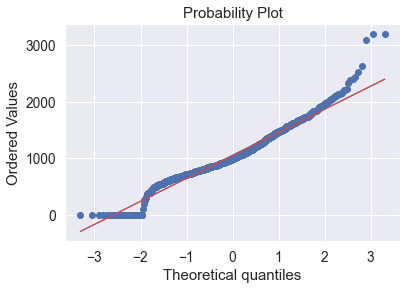

In [71]:
# Check on TotalBsmtSF
sns.distplot(df_train['TotalBsmtSF'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_train["TotalBsmtSF"],plot=plt)

"""Notice here in distplot TotalBsmtSF has a high density at 0 means that
the amount of houses don't have basement is huge so log transform cannot perfrom.
We can fix it by left all house has no basement out."""


In [75]:
# Create column for new variable(binary categorical feature)
# if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']),index=df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt']=1

In [78]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(
    df_train['TotalBsmtSF'])

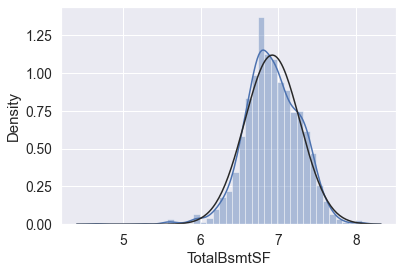

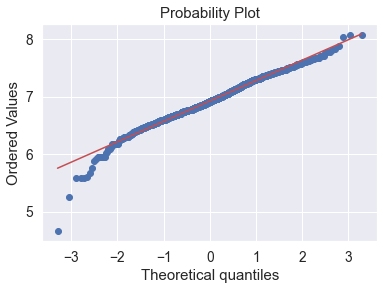

In [79]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [80]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

In [81]:
df_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.00,8450,7,5,2003,2003,196.00,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.00,9600,6,8,1976,1976,0.00,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.00,11250,7,5,2001,2002,162.00,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.00,9550,7,5,1915,1970,0.00,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.00,14260,8,5,2000,2000,350.00,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.00,7917,6,5,1999,2000,0.00,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.00,13175,6,6,1978,1988,119.00,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.00,9042,7,9,1941,2006,0.00,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.00,9717,5,6,1950,1996,0.00,49,...,0,0,0,1,0,0,0,0,1,0
